# Capstone Project — The Battle of Neighbourhoods**
Introduction
New Delhi is the capital city of India. It is a part of the city of Delhi’s 11 districts. The city itself has a population of 257,803. However, the much larger metro area has a population that exceeds 26 million.

New Delhi are used interchangeably to refer to the National Capital Territory of Delhi (NCT), these are two distinct entities, with New Delhi forming a small part of Delhi. The National Capital Region is a much larger entity comprising the entire NCT along with adjoining districts in neighboring states.

The official language of New Delhi and the one that is most widely spoken is Hindi. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in New Delhi City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .
Questions that can be asked using the above mentioned datasets
What is best location in New Delhi City for Chinese Cuisine ?
Which areas have large number of Chinese Resturant Market ?
Which all areas have less number of resturant ?
Which is the best place to stay if I prefer Chinese Cuisine ?
What places are have best restaurant in New Delhi?
Data
For this project we need the following data :

New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.
Data source : Zomato kaggel dataset
Description : This data set contains the required information. And we will use this data set to explore various locality of new delhi city.
Nearby places in each locality of new delhi city.
Data source : Fousquare API
Description : By using this api we will get all the venues in each neighborhood.

# Approach
Collect the new delhi city data from Zomato kaggel dataset
Using FourSquare API we will find all venues for each neighborhood.
Filter out all venues that are nearby by locality.
Using aggregative rating for each resturant to find the best places.
Visualize the Ranking of neighborhoods using folium library(python)

In [2]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium 
! pip install geocoder
import geocoder

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


In [3]:
# Read the zomato resturant data from csv file
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
df_india = df[df['Country Code'] == 1]
df_NDLS = df_india[df_india['City'] == 'New Delhi']
df_NDLS.reset_index(drop=True, inplace=True)
df_NDLS.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  ...            Currency  \
0                       Cuisine Varies  ...  Indian Rupees(Rs.)   
1                            Fast Food  ...  Indian Rupees(Rs.)   
2   North Indian, Seafood, Continental  ...  Indian Rupees(Rs.)   
3           South Indian, North Indian  ...  Indian Rupees(Rs.)   
4  South Indian, North Indian, Chinese  ...  Indian Rupees(Rs.)   

  Has Table booking Has Online delivery Is delivering now  \
0                No                  No                No   
1                No                 Yes                No   
2               Yes                 Yes                No   
3                No                  No                No   
4                No                 Yes                No   

  Switch to order menu Price range  Aggregate rating  Rating color  \
0                   No           2               0.0         White   
1                   No           1               3.2        Orange   
2                   No           3               3.4        Orange   
3                   No           2               2.6        Orange   
4                   No           2               3.4        Orange   

  Rating text Votes  
0   Not rated     2  
1     Average    46  
2     Average    45  
3     Average    11  
4     Average   238  

[5 rows x 21 columns]

In [5]:
#Data Cleaning
#remove the unwanted columns and rows from dataset

df_Res= df_NDLS[df_NDLS.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [6]:

df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [7]:

df_Res.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

In [16]:
#created map to show the restaurant cluters
New_Delhi_Rest = folium.Map(location=[28.52, 77.25], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(New_Delhi_Rest)  

New_Delhi_Rest

In [15]:
df_Res.head()
print("done")

done


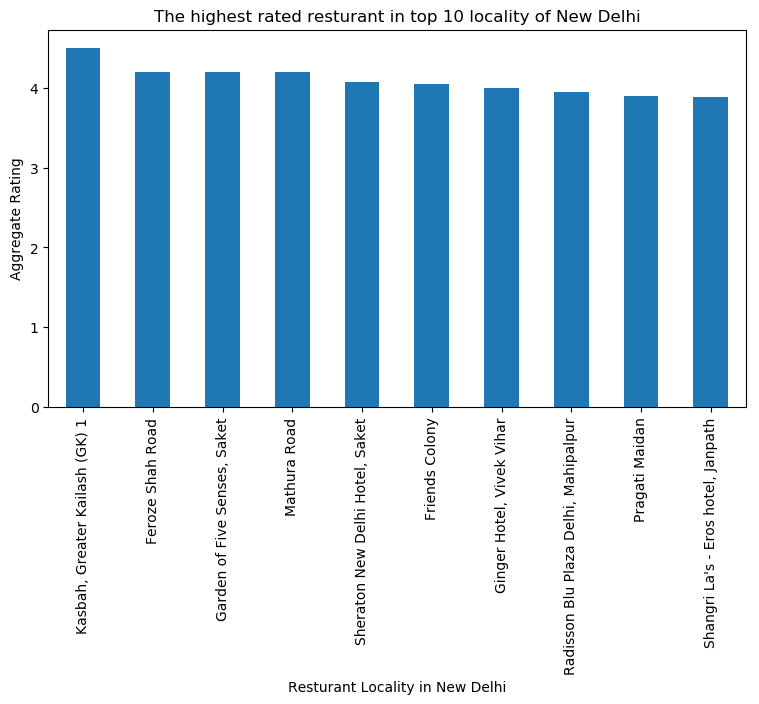

In [18]:
#What places are have best restaurant in New Delhi?
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

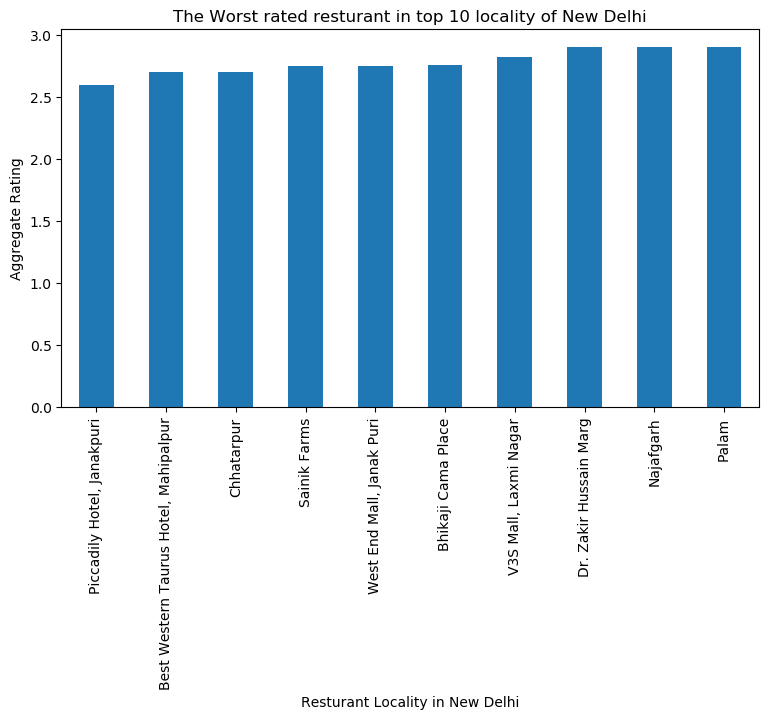

In [19]:
#what places are have worst restaurants in New Delhi?
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of New Delhi')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

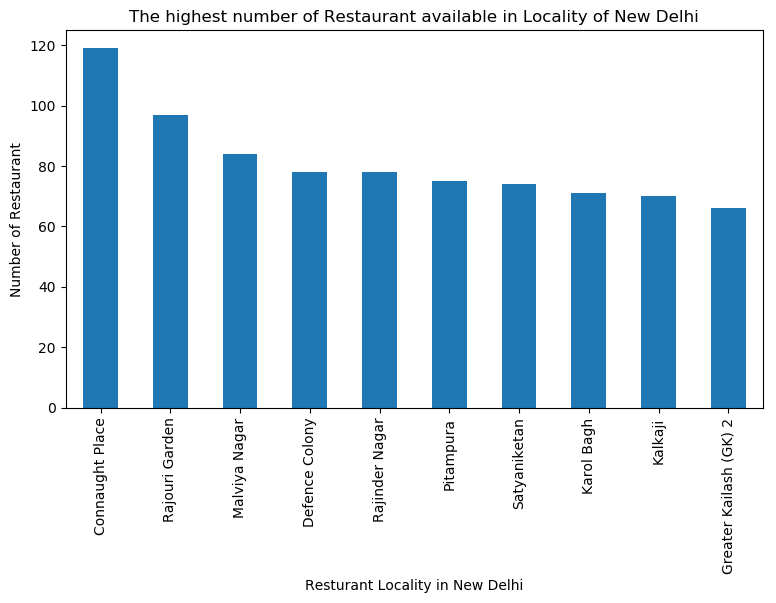

In [20]:
#Which place are suitable for edible person in New Delhi city?
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

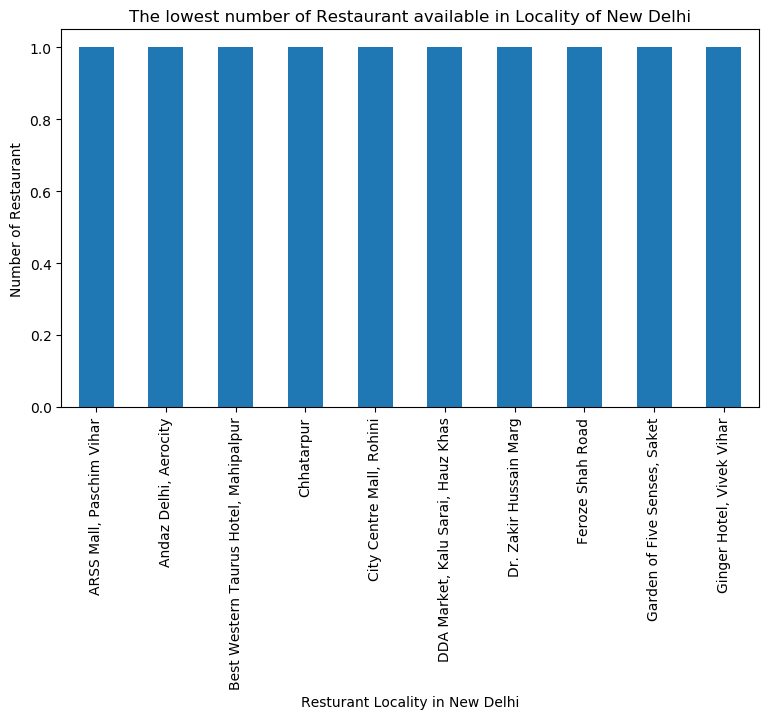

In [21]:
#Which place are not suitable for edible person in New Delhi city?
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of New Delhi')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

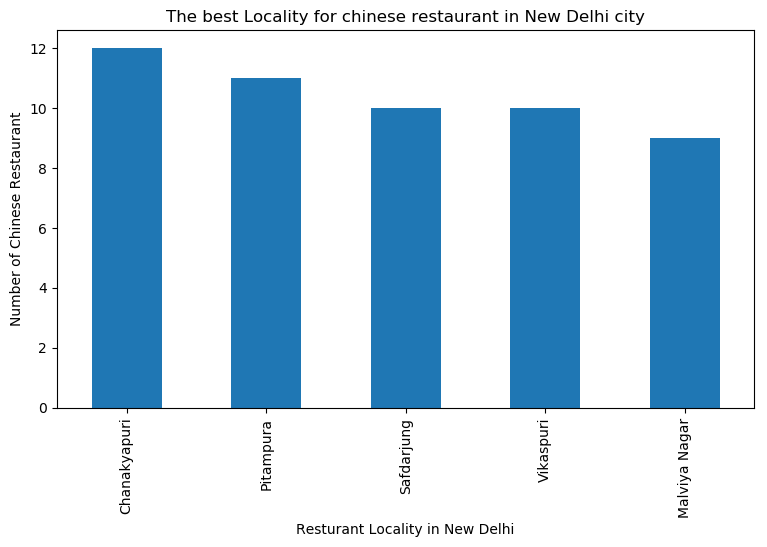

In [22]:
#What are the best places for chinese restaurant in New Delhi city
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

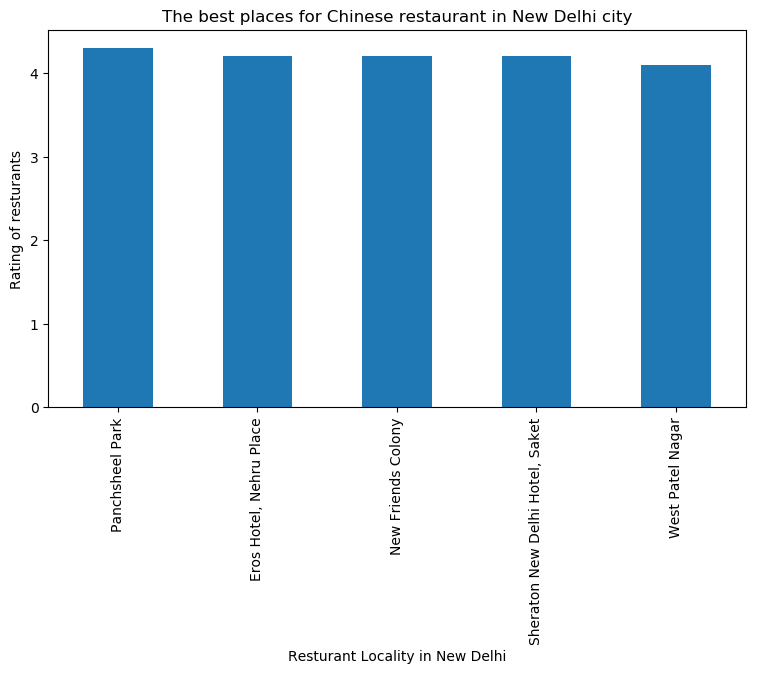

In [23]:
#which places are the best chinese resturants in New Delhi?
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

# Data transformation
# Based on Locality grouping the data

In [24]:

df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [25]:

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [26]:

df_final.shape

(240, 8)

In [34]:

## Define Foursquare Credentials and Version
CLIENT_ID = 'FU2IVLDD1GIBLQQVQQ0X03POVQAECFCTECWKNY1REG052HIC' # Foursquare ID
CLIENT_SECRET = 'WVTCXGRBE5XTHKUMQNOTPNL3XL5FDY4BCSG40FRYL4Q2KEK4' # Foursquare Secret
VERSION = '20200605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FU2IVLDD1GIBLQQVQQ0X03POVQAECFCTECWKNY1REG052HIC
CLIENT_SECRET:WVTCXGRBE5XTHKUMQNOTPNL3XL5FDY4BCSG40FRYL4Q2KEK4


# create a function to repeat the same process to all the Locality in New Delhi

In [35]:
## create a function to repeat the same process to all the Locality in New Delhi

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# find the venues in all New Delhi Locality

In [39]:
# find the venues in all New Delhi Locality
new_Delhi_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [40]:
new_Delhi_venues.head()

Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1                    Pizza Hut       28.670321        77.103853   
2              Café Coffee Day       28.670009        77.102480   
3  Baljeet's Amritsari Koolcha       28.665768        77.100481   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1         Pizza Place  
2         Coffee Shop  
3   Indian Restaurant  
4  Chinese Restaurant

In [41]:
new_Delhi_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                       11   
Adchini                                                         6   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   4   
Aggarwal City Plaza, Rohini                                     6   
Alaknanda                                                       6   
Ambience Mall, Vasant Kunj                                     47   
Anand Lok                                                      11   
Anand Vihar                                                     9   
Andaz Delhi, Aerocity                                          25   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                            10   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             4   
Barakhamba Road                                                18   
Basant Lok Market, Vasant Vihar                                29   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          11   
Bhikaji Cama Place                                             11   
Chanakyapuri                                                    4   
Chander Nagar                                                   1   
Chandni Chowk                                                  20   
Chawri Bazar                                                    7   
Chhatarpur                                                      7   
Chittaranjan Park                                               6   
City Centre Mall, Rohini                                        9   
City Square Mall, Rajouri Garden                               25   
Civil Lines                                                     6   
...                                                           ...   
The Lalit New Delhi, Barakhamba Road                            6   
The Leela Ambience Convention Hotel                             4   
The Leela Palace, Chanakyapuri                                 12   
The Lodhi, Lodhi Road                                          16   
The Park, Connaught Place                                      32   
The Suryaa New Delhi, New Friends Colony                       19   
The Taj Mahal Hotel, Mansingh Road                              6   
The Taj Palace Hotel, Chanakyapuri                             36   
The Uppal, Aerocity                                             4   
The Village Restaurant Complex, Khel Gaon Marg                 12   
Tilak Nagar                                                     4   
Tughlakabad Institutional Area                                  5   
Uday Park                                                       7   
Unity One Mall, Janakpuri                                       8   
Uttam Nagar                                                     2   
V3S Mall, Laxmi Nagar                                          17   
Vasant Kunj                                                     7   
Vasant Square Mall, Vasant Kunj                                10   
Vasant Vihar                                                   29   
Vasundhara Enclave                                              1   
Vijay Nagar                                                    15   
Vikas Marg                                                      8   
Vikaspuri                                                       3   
Vivek Vihar                                                     5   
West End Mall, Janak Puri                                      14   
West Gate Mall, Rajouri Garden                

In [42]:
print('There are {} uniques categories.'.format(len(new_Delhi_venues['Venue Category'].unique())))

There are 227 uniques categories.


In [43]:

## Analyze Each Locality

# one hot encoding
new_Delhi_onehot = pd.get_dummies(new_Delhi_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
new_Delhi_onehot['Locality'] = new_Delhi_venues['Locality'] 

# move Locality column to the first column
column_list = new_Delhi_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
new_Delhi_onehot = new_Delhi_onehot[column_list]

new_Delhi_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  ...  Turkish Restaurant  \
0                 0                    0  ...                   0   
1                 0                    0  ...                   0   
2                 0                    0  ...                   0   
3                 0                    0  ...                   0   
4                 0                    0  ...                   0   

   Udupi Restaurant  Vegetarian / Vegan Restaurant  Vietnamese Restaurant  \
0                 0                              0                      0   
1                 0                              0                      0   
2                 0                              0                      0   
3                 0                              0                      0   
4                 0                              0                      0   

   Whisky Bar  Wine Bar  Wine Shop  Wings Joint  Women's Store  Yoga Studio  
0           0         0          0            0              0            0  
1           0         0          0            0              0            0  
2           0         0          0            0              0            0  
3           0         0          0            0              0            0  
4           0         0          0            0              0            0  

[5 rows x 228 columns]

In [44]:

New_Delhi_grouped = new_Delhi_onehot.groupby('Locality').mean().reset_index()
New_Delhi_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.090909   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.111111   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
..                                              ...       ...   
208            The Lalit New Delhi, Barakhamba Road  0.000000   
209             The Leela Ambience Convention Hotel  0.000000   
210                  The Leela Palace, Chanakyapuri  0.000000   
211                           The Lodhi, Lodhi Road  0.000000   
212                       The Park, Connaught Place  0.000000   
213        The Suryaa New Delhi, New Friends Colony  0.000000   
214              The Taj Mahal Hotel, Mansingh Road  0.000000   
215              The Taj Palace Hotel, Chanakyapuri  0.000000   
216                             The Uppal, Aerocity  0.000000   
217  The Village Restaurant Complex, Khel Gaon Marg  0.000000   
218                                     Tilak Nagar  0.000000   
219                  Tughlakabad Institutional Area  0.000000   
220                                       Uday Park  0.000000   
221                       Unity One Mall, Janakpuri  0.000000   
222                                     Uttam Nagar  0.500000   
223                           V3S Mall, Laxmi Nagar  0.000000   
224                                     Vasant Kunj  0.000000   
225                 Vasant Square Mall, Vasant Kunj  0.000000   
226                                    Vasant Vihar  0.000000   
227                              Vasundhara Enclave  1.000000   
228                                     Vijay Nagar  0.000000   
229                                      Vikas Marg  0.125000   
230                                       Vikaspuri  0.000000   
231                                     Vivek Vihar  0.000000   
232                       West End Mall, Janak Puri  0.000000   
233                  West Gate Mall, Rajouri Garden  0.000000   
234                                West Patel Nagar  0.000000   
235                           Worldmark 1, Aerocity  0.000000   
236                                     Yusuf Sarai  0.000000   
237                        ibis New Delhi, Aerocity  0.000000   

     Accesso

In [45]:
New_Delhi_grouped.shape

(238, 228)

In [46]:

## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in New_Delhi_grouped['Locality']:
    print("----"+hood+"----")
    temp = New_Delhi_grouped[New_Delhi_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
               venue  freq
0  Indian Restaurant  0.18
1                ATM  0.09
2        Coffee Shop  0.09
3                Gym  0.09
4     Sandwich Place  0.09


----Adchini----
               venue  freq
0               Café  0.33
1  Indian Restaurant  0.17
2             Lounge  0.17
3                Pub  0.17
4   Parsi Restaurant  0.17


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1          Multiplex   0.2
2  Indian Restaurant   0.2
3      Shopping Mall   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1        Airport Lounge  0.14
2      Airport Terminal  0.14
3           Coffee Shop  0.14
4  Fast Food Restaurant  0.14


----Aggarwal City Mall, Pitampura----
               venue  freq
0        Pizza Place  0.25
1   Department Store  0.25
2  Indian Restaurant  0.25
3   Business Service  0.25
4                ATM  0.00


----Aggarwal City Pl

                  venue  freq
0           Coffee Shop  0.08
1  Fast Food Restaurant  0.06
2    Italian Restaurant  0.06
3                  Café  0.06
4     Indian Restaurant  0.06


----DLF Place Mall, Saket----
               venue  freq
0  Indian Restaurant  0.12
1             Lounge  0.07
2     Clothing Store  0.07
3               Café  0.07
4                Bar  0.07


----DLF Promenade Mall, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.09
1  Fast Food Restaurant  0.06
2    Italian Restaurant  0.06
3                  Café  0.06
4      Asian Restaurant  0.06


----DLF South Square, Sarojini Nagar----
                  venue  freq
0     Indian Restaurant  0.23
1         Women's Store  0.15
2  Fast Food Restaurant  0.15
3                Market  0.08
4      Department Store  0.08


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.25
1         Restaurant  0.12
2             Hostel  0.12
3              Hotel  0.12
4      Movie Theater  0.06

              venue  freq
0        Restaurant  0.15
1       Pizza Place  0.10
2              Café  0.10
3    Ice Cream Shop  0.10
4  Asian Restaurant  0.05


----JNU----
               venue  freq
0  Indian Restaurant  0.25
1      Shopping Mall  0.25
2     Clothing Store  0.25
3               Café  0.25
4                ATM  0.00


----JW Marriott New Delhi----
               venue  freq
0              Hotel  0.33
1        Coffee Shop  0.07
2  Indian Restaurant  0.07
3          Hotel Bar  0.07
4                Spa  0.04


----Jail Road----
                 venue  freq
0    Indian Restaurant  0.33
1          Pizza Place  0.17
2    Indian Sweet Shop  0.17
3  Fried Chicken Joint  0.17
4       Ice Cream Shop  0.17


----Jama Masjid----
                venue  freq
0   Indian Restaurant  0.38
1         Snack Place  0.12
2  Frozen Yogurt Shop  0.12
3              Mosque  0.12
4         Flea Market  0.12


----Janakpuri----
           venue  freq
0           Café  0.50
1            Gym  0.25
2

               venue  freq
0            Theater  0.18
1  Indian Restaurant  0.12
2             Bakery  0.12
3               Café  0.12
4        Coffee Shop  0.12


----Mathura Road----
                         venue  freq
0            Indian Sweet Shop  0.33
1               Breakfast Spot  0.33
2           Light Rail Station  0.33
3                          ATM  0.00
4  Northeast Indian Restaurant  0.00


----Mayapuri Phase 2----
         venue  freq
0  Auto Garage  0.25
1   Food Truck  0.25
2        Hotel  0.25
3       Garden  0.25
4          ATM  0.00


----Mayur Vihar Phase 1----
                  venue  freq
0           Pizza Place  0.25
1     Indian Restaurant  0.25
2  Gym / Fitness Center  0.25
3                Garden  0.25
4             Pet Store  0.00


----Mayur Vihar Phase 2----
            venue  freq
0     Wings Joint   0.2
1  Ice Cream Shop   0.2
2       Juice Bar   0.2
3            Café   0.2
4  Sandwich Place   0.2


----Mayur Vihar Phase 3----
                          

                 venue  freq
0    Indian Restaurant  0.22
1           Restaurant  0.22
2           Food Truck  0.11
3  Moroccan Restaurant  0.11
4               Hostel  0.11


----R K Puram----
                     venue  freq
0        Electronics Store  0.14
1  Comfort Food Restaurant  0.14
2         Asian Restaurant  0.14
3                     Park  0.14
4              Coffee Shop  0.14


----Race Course----
                  venue  freq
0        History Museum   0.2
1                  Food   0.2
2             Racetrack   0.2
3                Lounge   0.2
4  Gym / Fitness Center   0.2


----Radisson Blu Plaza Delhi, Mahipalpur----
                 venue  freq
0                Hotel  0.25
1                  Spa  0.12
2  American Restaurant  0.12
3                Motel  0.12
4      Thai Restaurant  0.12


----Radisson Blu, Paschim Vihar----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2           Coffee Shop  0.14
3     Indian Restaurant  0.

                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.08
2        Clothing Store  0.08
3        Sandwich Place  0.04
4   Fried Chicken Joint  0.04


----The Imperial, Janpath----
                      venue  freq
0         Indian Restaurant  0.17
1                     Hotel  0.14
2        Italian Restaurant  0.09
3                    Lounge  0.09
4  Mediterranean Restaurant  0.06


----The India Mall, New Friends Colony----
                venue  freq
0                Café  0.18
1  Italian Restaurant  0.06
2              Lounge  0.06
3               Plaza  0.06
4               Diner  0.06


----The Lalit New Delhi, Barakhamba Road----
               venue  freq
0             Bakery  0.33
1  Indian Restaurant  0.33
2          Hotel Bar  0.17
3   Asian Restaurant  0.17
4                ATM  0.00


----The Leela Ambience Convention Hotel----
               venue  freq
0        Pizza Place  0.25
1  Indian Restaurant  0.25
2              Hotel  0.25
3       

In [47]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [48]:

## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = New_Delhi_grouped['Locality']

for ind in np.arange(New_Delhi_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(New_Delhi_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality 1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar     Indian Restaurant   
1                                           Adchini                  Café   
2                     Aditya Mega Mall, Karkardooma           Pizza Place   
3                                          Aerocity                 Hotel   
4                     Aggarwal City Mall, Pitampura     Indian Restaurant   
5                       Aggarwal City Plaza, Rohini           Pizza Place   
6                                         Alaknanda     Food & Drink Shop   
7                        Ambience Mall, Vasant Kunj           Coffee Shop   
8                                         Anand Lok                  Café   
9                                       Anand Vihar                  Café   
10                            Andaz Delhi, Aerocity                 Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg           Snack Place   
12                                    Asaf Ali Road                Hostel   
13                              Ashok Vihar Phase 1           Pizza Place   
14                              Ashok Vihar Phase 2           Pizza Place   
15                              Ashok Vihar Phase 3     Indian Restaurant   
16                                  Barakhamba Road     Indian Restaurant   
17                  Basant Lok Market, Vasant Vihar                  Café   
18                    Bellagio, Ashok Vihar Phase 2           Pizza Place   
19            Best Western Taurus Hotel, Mahipalpur                 Hotel   
20                               Bhikaji Cama Place                Lounge   
21                                     Chanakyapuri                  Café   
22                                    Chander Nagar           Pizza Place   
23                                    Chandni Chowk     Indian Restaurant   
24                                     Chawri Bazar        Hardware Store   
25                                       Chhatarpur     Indian Restaurant   
26                                Chittaranjan Park  Fast Food Restaurant   
27                         City Centre Mall, Rohini         Shopping Mall   
28                 City Square Mall, Rajouri Garden     Indian Restaurant   
29                                      Civil Lines                  Café   
..                                              ...                   ...   
208            The Lalit New Delhi, Barakhamba Road     Indian Restaurant   
209             The Leela Ambience Convention Hotel     Indian Restaurant   
210                  The Leela Palace, Chanakyapuri     Indian Restaurant   
211                           The Lodhi, Lodhi Road     Indian Restaurant   
212                       The Park, Connaught Place                 Hotel   
213        The Suryaa New Delhi, New Friends Colony                  Café   
214              The Taj Mahal Hotel, Mansingh Road     Indian Restaurant   
215              The Taj Palace Hotel, Chanakyapuri     Indian Restaurant   
216                             The Uppal, Aerocity                 Hotel   
217  The Village Restaurant Complex, Khel Gaon Marg                   Bar   
218                                     Tilak Nagar  Fast Food Restaurant   
219                  Tughlakabad Institutional Area                 Hotel   
220                                       Uday Park           Pizza Place   
221                       Unity One Mall, Janakpuri     Indian Restaurant   
222                                     Uttam Nagar                   ATM   
223                           V3S Mall, Laxmi Nagar  Fast Food Restaurant   
224                                     Vasant Kunj           Pizza Place   
225                 Vasant Square Mall, Vasant Kunj  Fast Food Restaurant   
226                                    Vasant Vihar                  Café   
227                              Vasundhara Enclave                   ATM   
228                                    

In [49]:

## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

New_Delhi_clustering = New_Delhi_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(New_Delhi_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [51]:
New_Delhi_merged = df_final.head(238)
New_Delhi_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
New_Delhi_merged = New_Delhi_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

New_Delhi_merged.head()

C:\Users\munishar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                             Cusines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               4   
1  Average, Good, Poor, Very Good         1560               0   
2                   Average, Good          434               3   
3                         Average           59               1   
4                         Average          126               3   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                Bakery                   Gym   
1                  Café                   Pub      Parsi Restaurant   
2           Pizza Place     Indian Restaurant         Shopping Mall   
3                 Hotel           Coffee Shop  Fast Food Restaurant   
4     Indian Restaurant      Department Store      Business Service   

  4th Most Common Venue           5th Most Common Venue 6th Most Common Venue  \
0                Market  Multicuisine Indian Restaurant           Coffee Shop   
1                Lounge               Indian Restaurant            Food Court   
2             Multiplex                           Hotel                  Café   
3   Rental Car Location                  Airport Lounge      Airport Terminal   
4           Pizza Place                   Deli / Bodega          Cupcake Shop   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0    Chinese Restaurant        Sandwich Place                   ATM   
1            Food Truck     Food & Drink Shop                  Food   
2           Event Space            Food Court     Food & Drink Shop   
3                  Farm     Fish & Chips Shop           Flea Market   
4   Fried Chicken Joint     French Restaurant            Food Truck   

  10th Most Common Venue  
0            Pizza Place  
1            Event Space  
2                   Food  
3            Flower Shop  
4             Food Court

In [52]:

# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(New_Delhi_merged['Lat'], New_Delhi_merged['Lng'], New_Delhi_merged['Locality'], New_Delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:

## Examine Clusters

## Cluster 1
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 0, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
8    28.555599    3.800000                         Average, Very Good   
9    28.659870    3.281481                              Average, Good   
17   28.557846    3.220000                        Average, Good, Poor   
20   28.568193    2.755556                              Average, Poor   
21   28.589797    3.085714                        Average, Good, Poor   
26   28.538688    3.130303                        Average, Good, Poor   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
30   28.561898    3.100000                              Average, Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
58   28.514237    4.200000                                  Very Good   
64   28.538014    3.475000                              Average, Good   
75   28.569040    3.800000                            Good, Very Good   
81   28.536611    3.380000                         Average, Excellent   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
91   28.556503    3.400000                              Average, Good   
100  28.556869    4.500000                                  Excellent   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
121  28.702381    3.100000                                    Average   
127  28.619410    3.134615                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
140  28.627959    3.004167                                    Average   
143  28.564494    3.140625                   Average, Good, Very Good   
146  28.535040    3.175000                              Average, Good   
170  28.643757    3.575000                              Average, Good   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
174  28.550802    3.250000                              Average, Good   
177  28.511482    2.750000                              Average, Poor   
179  28.572117    3.871429                   Average, Good, Very Good   
181  28.571849    3.316667                              Average, Good   
189  28.620715    3.880000                   Average, Good, Very Good   
190  28.577107    3.100000                                    Average   
202  28.646593    3.280952                   Average, Good, Very Good   
207  28.625445    3.600000                   Average, Good, Very Good   
213  28.623619    3.466667                              Average, Good   
228  28.596073    3.052941                              Average, Good   
229  28.692519    3.606452        Average, Excellent, Good, Very Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
1           1560               0                  Café   
8           2411               0                  Café   
9           1309               0                  Café   
17          1875               0                  Café   
20           339               0                Lounge   
21          1617               0                  Café   
26          2578               0  Fast Food Restaurant   
28          1217               0     Indian Restaurant   
29           769               0                  Café   
30          1514               0                  Café   
45         19479               0                  Café   
58          1561               0           Coffee Shop   
64           369               0                Bakery   
75          1513               0                Lounge   
81           883               0            Restaurant   
82           609               0     Indian Restaurant   
86          4011               

In [54]:
## Examine Clusters

## Cluster 2
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 1, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
72   28.705700    3.350000                        Average, Good          278   
74   28.621267    3.416667                        Average, Good          475   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
125  28.627715    3.125000                        Average, Good          171   
128  28.608252    2.945000                        Average, Good          406   
148  28.642402    3.195652                        Average, Good         2177   
161  28.639872    3.134483                  Average, Good, Poor         1481   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
219  28.638846    3.048148                        Average, Good          290   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 1                 Hotel           Coffee Shop   
10                1                 Hotel     Indian Restaurant   
12                1                Hostel     Indian Restaurant   
19                1                 Hotel       Bed & Breakfast   
35                1                 Hotel                   Bar   
56                1                 Hotel                   Gym   
60                1                 Hotel     Indian Restaurant   
69                1                 Hotel       Bed & Breakfast   
70                1                 Hotel            Restaurant   
72                1                Garden                 Hotel   
74                1                 Hotel     Indian Restaurant   
83                1                 Hotel           Coffee Shop   
111               1                 Hotel     Indian Restaurant   
112               1                 Hotel           Coffee Shop   
119               1                 Hotel     Indian Restaurant   
125               1                Garden            Food Truck   
128               1                 Hotel           Yoga Studio   
148               1           Coffee Shop         Shopping Mall   
161               1           Pizza Place           Candy Store   
162               1                 Hotel                  Café   
167               1                Lounge  

In [55]:

## Examine Clusters

## Cluster 3
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 2, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
5    28.700516    3.040000             Average, Good, Poor          594   
22   28.654105    3.085714                         Average           80   
50   28.645084    3.235000  Average, Good, Poor, Very Good         2578   
57   28.699837    3.376471        Average, Good, Very Good         2460   
73   28.643036    3.000000                         Average            7   
90   28.642755    3.450000                   Average, Good          322   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
151  28.592153    3.200000                         Average           14   
160  28.712975    3.066667                         Average          121   
169  28.667261    3.200000                         Average           76   
180  28.534499    3.000000             Average, Good, Poor          173   
187  28.629634    2.942857                         Average          151   
220  28.523519    3.700000                            Good          281   
224  28.636921    2.819231             Average, Good, Poor         2265   
230  28.658041    3.400000                         Average           19   
234  28.630044    2.750000                   Average, Poor          238   

     Cluster Labels 1st Most Common Venue     2nd Most Common Venue  \
5                 2           Pizza Place      Fast Food Restaurant   
22                2           Pizza Place        Frozen Yogurt Shop   
50                2           Pizza Place                       Gym   
57                2           Pizza Place  Bike Rental / Bike Share   
73                2           Pizza Place                       Gym   
90                2           Pizza Place      Fast Food Restaurant   
101               2           Pizza Place       American Restaurant   
103               2                   ATM               Pizza Place   
104               2           Pizza Place         Accessories Store   
110               2           Pizza Place              Dessert Shop   
130               2           Pizza Place          Asian Restaurant   
132               2    Frozen Yogurt Shop               Coffee Shop   
151               2              Sake Bar               Golf Course   
160               2     Indian Restaurant               Pizza Place   
169               2                 Hotel         Indian Restaurant   
180               2                  Café                      Park   
187               2           Yoga Studio                     Diner   
220               2                 Hotel                Steakhouse   
224               2  Fast Food Restaurant               Pizza Place   
230               2                   ATM               Art Gallery   
234               2     Indian Restaurant            Sandwich Place   

             3rd Most Common Venue 4th Most Common Venue  \
5                        Multiplex           Bus Station   
22               French Restaurant            Food Truck   
50                             Bar    Chinese Restaurant   
57                      Food Truck    Falafel Restaurant   
73                             Bar       Bed & Breakfast   
90                             Bar                 Hotel   
101                    Bus Station         Metro Station   
103              Fish & Chips Shop     Convenience Store   
104                           Park           Event Space   
110                         Arcade                Bakery   
130                  Shopping Mall  Fast Food Restaurant   
132                     Donut Shop    Chinese Restaurant   
151              

In [56]:
## Examine Clusters

## Cluster 4
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] ==3 , New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
2    28.656131    3.275000                              Average, Good   
4    28.690020    3.033333                                    Average   
15   28.691136    3.390909                   Average, Good, Very Good   
16   28.630440    3.208333                        Average, Good, Poor   
23   28.656414    3.358182                   Average, Good, Very Good   
33   28.657388    3.320000                              Average, Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
66   28.699373    3.252174                              Average, Good   
71   28.641003    3.650000                              Average, Good   
76   28.576785    3.200000                              Average, Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
98   28.651527    3.490909                   Average, Good, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
108  28.563827    3.800000                            Good, Very Good   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
144  28.591092    3.200000                        Average, Good, Poor   
152  28.544464    3.525000                         Average, Very Good   
155  28.669160    3.148214                        Average, Good, Poor   
159  28.613748    3.900000                         Average, Excellent   
164  28.668055    3.393333        Average, Excellent, Good, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
192  28.526856    4.066667                                  Very Good   
198  28.636712    3.023529                              Average, Poor   
208  28.562469    2.971429                        Average, Good, Poor   
209  28.631362    3.537500                              Average, Good   
218  28.552403    3.833333                            Good, Very Good   
221  28.560593    3.733333                   Average, Good, Very Good   
222  28.628988    3.260000                        Average, Good, Poor   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
2            434               3           Pizza Place     Indian Restaurant   
4            126               3     Indian Restaurant      Department Store   
15           485               3     Indian Restaurant                Garden   
16          1779               3     Indian Restaurant               Theater   
23          6668               3     Indian Restaurant           Snack Place   
33           636               3     Indian Restaurant           Pizza Place   
42           542               3     Indian Restaurant         Women's Store   
43          2570               3     Indian Restaurant                 Hotel   
46          1106               3     Indian Restaurant         Train Station   
49             7               3     Indian Restaurant           Golf Course   
55          3010               3     Indian Restaurant        Cosmetics Shop   
66           973               3     Indian Restaurant           Snack Place   
71           367               3     Indian Restau

In [57]:

## Examine Clusters

## Cluster 5
New_Delhi_merged.loc[New_Delhi_merged['Cluster Labels'] == 4, New_Delhi_merged.columns[[1] + list(range(5, New_Delhi_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
11   28.562580    3.750000                   Average, Good, Very Good   
13   28.690182    3.090000                        Average, Good, Poor   
14   28.693969    3.378571                              Average, Good   
18   28.696302    3.300000                              Average, Good   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
25   28.495624    2.700000                                    Average   
27   28.716874    3.400000                                    Average   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
47   28.681582    3.046875                        Average, Good, Poor   
48   28.630149    2.950000                        Average, Good, Poor   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
54   28.543798    3.500000                              Average, Good   
59   28.654883    3.053846                              Average, Good   
61   28.668181    3.400000                                    Average   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
..         ...         ...                                        ...   
178  28.520095    3.256250             Average, Good, Poor, Very Good   
182  28.587918    3.541892  Average, Excellent, Good, Poor, Very Good   
183  28.670776    3.100000                                    Average   
184  28.528743    3.764000  Average, Excellent, Good, Poor, Very Good   
185  28.683364    3.000000                              Average, Good   
186  28.548922    3.715385  Average, Excellent, Good, Poor, Very Good   
191  28.522279    3.100000                                    Average   
193  28.569983    3.133333                        Average, Good, Poor   
194  28.566717    3.303125                   Average, Good, Very Good   
195  28.527731    3.450000                              Average, Good   
197  28.592724    2.985714                                    Average   
199  28.601779    3.700000                   Average, Good, Very Good   
200  28.564288    3.200000                                    Average   
201  28.651299    3.500000                              Average, Good   
203  28.601187    3.633333                              Average, Good   
205  28.600171    3.714286                   Average, Good, Very Good   
206  28.538993    3.450000                              Average, Good   
210  28.661133    3.775000                            Good, Very Good   
211  28.579556    3.780000                                       Good   
214  28.561105    3.425000                              Average, Good   
215  28.605069    3.785714                   Average, Good, Very Good   
217  28.535183    3.066667                                    Average   
223  28.619954    2.905714                              Average, Poor